<a href="https://colab.research.google.com/github/younghoonNa/ML/blob/main/Day4_Customer_Satisfaction_ipynb22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Satisfaction

## 데이터분석과 시각화, 머신러닝 알고리즘으로 은행 고객 만족도 예측하기

기업의 C-suites(중역)에게 고객의 만족도는 매우 중요한 요소입니다. 그러나 불행하게도 고객은 c-suites 근처에 있지도 않고, 그들의 불만을 잘 토로하지도 않습니다.

그런 이유로 은행에서는 이미 수집한 데이터를 토대로 고객의 만족도를 예측하여 늦기 전에 그들의 만족도 위한 능동적인 행동을 취하고 싶어합니다.

여러분은 수백개의 익명처리된 변수를 이용하여 고객의 만족도를 예측해주세요.

## 파일 구성
 - **train.csv**: 학습 데이터
 - **test.csv**: 평가 데이터
 - **submission.csv**: 제출 데이터

## 특성 설명
 - 모든 feature는 익명처리되어 있습니다.
 - `TARGET`: 0->만족, 1->불만족, 레이블 (종속변수, 타겟변수)

## 평가 측도
 - **`auc`**: 높을수록 좋음

# 필수 모듈

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install jaen

In [ ]:
# ID@jaen.com
# ID를 문자열로 입력해주세요.
#ID = 
#email = ID + '@jaen.com'
email = '20185124@jaen.com'

In [ ]:
from JAEN.project import Project
pjt = Project('고객 만족도 예측', 
              '한림대-파이썬을활용한-머신러닝프로젝트',        
              '1차수 A반',       
              email)

# 데이터 다운로드

In [ ]:
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/hl_customer_satis.zip

--2022-02-17 03:36:26--  http://sk.jaen.kr:8080/hl_customer_satis.zip
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.
HTTP request sent, awaiting response... 304 Not Modified
File ‘hl_customer_satis.zip’ not modified on server. Omitting download.



In [ ]:
import zipfile

# 데이터 폴더
DATA_DIR = './data'

with zipfile.ZipFile("hl_customer_satis.zip" , "r") as zip_ref:
    zip_ref.extractall(DATA_DIR)

# Baseline

In [ ]:
# 데이터 로드
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/submission.csv')

In [ ]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
li_drop = [
           'ind_var2_0', 'ind_var2', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46',
           'num_var27_0','num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28',
           'saldo_var27', 'saldo_var41', 'saldo_var46',
           'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
           'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1',
           'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3',
           'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3',
           'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3', 'ind_var27_0', 'ID'
]

same_list = [
             'ind_var13_medio', 'ind_var18', 'ind_var26', 'ind_var25', 'ind_var29_0', 'ind_var29', 'ind_var32', 'ind_var34', 'ind_var37',
               'ind_var39', 'num_var18', 'num_var26', 'num_var25', 'num_var29_0', 'num_var29', 'num_var29', 'num_var32', 'num_var34', 'num_var37', 'num_var39',
               'saldo_var29', 'delta_num_compra_var44_1y3', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_trasp_var17_in_1y3',
               'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'delta_num_venta_var44_1y3', 'num_meses_var13_medio_ult3', 'num_var13_medio', 
            'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_out_1y3', 'saldo_medio_var13_medio_ult1' ]

In [ ]:
train = train.drop(li_drop, axis=1)
test = test.drop(li_drop, axis=1)

train = train.drop(same_list, axis=1)
test = test.drop(same_list, axis=1)

In [ ]:
def var38_(x):
  return np.log1p(x)

train['var38'] = var38_(train['var38'])
test['var38'] = var38_(test['var38'])

In [ ]:
# def age_ (x):
#   return x//10

# train['Age'] = age_(train['var15'])
# test['Age'] = age_(test['var15'])

# train = train.drop('var15', axis=1)
# test = test.drop('var15', axis=1)

In [ ]:
# train = train.astype({'Age':object})
# test = test.astype({'Age':object})

In [ ]:
# # 범주형 데이터 바꾸고
# pr_es = pd.get_dummies(train['Age'])

# pr_es_TEST = pd.get_dummies(test['Age'])

# train = pd.concat((train, pr_es), axis=1)
# test = pd.concat((test,pr_es_TEST), axis=1)

# train = train.drop('Age', axis=1)
# test = test.drop('Age', axis=1)

In [ ]:
train.loc[train['var3'] == '-999999.0', 'var3'] = train.loc[train['var3'] != '-999999.0', 'var3'].mean()

In [ ]:
train['var3'].value_counts()

 2.0         74165
 8.0           138
-999999.0      116
 9.0           110
 3.0           108
             ...  
 231.0           1
 188.0           1
 168.0           1
 135.0           1
 87.0            1
Name: var3, Length: 208, dtype: int64

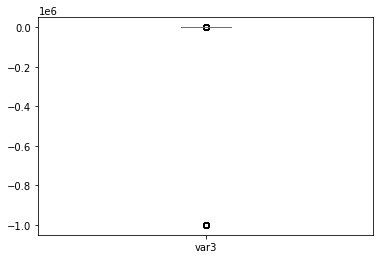

In [ ]:
train['var3'].plot(kind='box')

In [ ]:
train

,var3,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,...,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,0,1,2,3,4,5,6,7,8,9,10
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.576589,0,0,0,1,0,0,0,0,0,0,0,0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,...,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.805254,0,0,0,0,1,0,0,0,0,0,0,0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.117432,0,0,0,1,0,0,0,0,0,0,0,0
3,2.0,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.066779,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.672592,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.017440,0,0,0,0,0,1,0,0,0,0,0,0
76016,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,31837.02,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.683811,0,0,0,0,1,0,0,0,0,0,0,0
76017,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.212214,0,0,0,1,0,0,0,0,0,0,0,0
76018,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
cc2 = con['TARGET'].sort_values(ascending=False)[:10]
cc2

TARGET                     1.000000
var36                      0.102919
var15                      0.101322
ind_var8_0                 0.046665
num_var8_0                 0.046622
imp_op_var39_efect_ult1    0.030380
imp_op_var41_efect_ult1    0.029479
num_var8                   0.027926
ind_var8                   0.027926
imp_op_var41_ult1          0.027586
Name: TARGET, dtype: float64

In [ ]:
con = train.corr()
con['TARGET'].sort_values(ascending=True)[:10]

ind_var30             -0.149811
num_meses_var5_ult3   -0.148253
num_var30             -0.138289
num_var42             -0.135693
ind_var5              -0.135349
num_var5              -0.134095
2                     -0.132294
num_var4              -0.080194
num_var35             -0.076872
var38                 -0.055836
Name: TARGET, dtype: float64

In [ ]:
test.head()

,var3,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,...,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,0,1,2,3,4,5,6,7,8,9,10
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.609874,0,0,0,1,0,0,0,0,0,0,0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.725198,0,0,0,1,0,0,0,0,0,0,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.757795,0,0,1,0,0,0,0,0,0,0,0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.143663,0,0,1,0,0,0,0,0,0,0,0
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.207089,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
train['ind_var30'].value_counts()

1    55710
0    20310
Name: ind_var30, dtype: int64

In [ ]:
train['num_meses_var5_ult3'].value_counts()

3    42838
0    20546
2     9368
1     3268
Name: num_meses_var5_ult3, dtype: int64

In [ ]:
train['var36'].value_counts()

99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

In [ ]:
submission.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [ ]:
train.columns

Index([                   'var3',      'imp_ent_var16_ult1',
       'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3',
       'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3',
       'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3',
             'imp_op_var40_ult1', 'imp_op_var41_comer_ult1',
       ...
                               1,                         2,
                               3,                         4,
                               5,                         6,
                               7,                         8,
                               9,                        10],
      dtype='object', length=314)

In [ ]:
li = test.columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# X = train[cc_list].iloc[:, :-1]
X = train[li]
Y = train['TARGET']

model = XGBClassifier(n_estimators=1000)
model.fit(X, Y)

XGBClassifier(n_estimators=1000)

In [ ]:
pred = model.predict_proba(test)[:,1]
pred

array([0.05416195, 0.05178921, 0.00356296, ..., 0.00292984, 0.05956578,
       0.00229649], dtype=float32)

In [ ]:
submission['TARGET'] = pred

In [ ]:
submission

,ID,TARGET
0,2,0.054162
1,5,0.051789
2,6,0.003563
3,7,0.015675
4,9,0.007001
...,...,...
75813,151831,0.118264
75814,151832,0.013455
75815,151833,0.002930
75816,151834,0.059566


# 이제부터 자유롭게 분석, 예측을 진행하시면 됩니다.

In [ ]:
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-07-48-33.csv
제출 여부 :success
오늘 제출 횟수 : 11
제출 결과:0.81654
